# Ted Talks Dataset
dataset source : https://www.kaggle.com/rounakbanik/ted-talks

## Data Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('ted_main.csv')
df2 = pd.read_csv('ted_transcripts.csv')

In [3]:
df1.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [4]:
import datetime
df1['film_date'] = df1['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df1['published_date'] = df1['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [5]:
df1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


In [7]:
df1.nunique()

comments               559
description           2550
duration              1083
event                  355
film_date              732
languages               66
main_speaker          2156
name                  2550
num_speaker              5
published_date        2365
ratings               2550
related_talks         2550
speaker_occupation    1458
tags                  2530
title                 2550
url                   2550
views                 2550
dtype: int64

In [8]:
df1.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [9]:
df1.dropna(subset=['speaker_occupation'],inplace=True)

In [10]:
df1.reset_index(inplace=True)

# Graphic

In [11]:
df1_new = df1[['comments', 'event', 'main_speaker','title', 'speaker_occupation', 'views', 'published_date']]

In [12]:
df1_new.head()

,comments,event,main_speaker,title,speaker_occupation,views,published_date
0,4553,TED2006,Ken Robinson,Do schools kill creativity?,Author/educator,47227110,27-06-2006
1,265,TED2006,Al Gore,Averting the climate crisis,Climate advocate,3200520,27-06-2006
2,124,TED2006,David Pogue,Simplicity sells,Technology columnist,1636292,27-06-2006
3,200,TED2006,Majora Carter,Greening the ghetto,Activist for environmental justice,1697550,27-06-2006
4,593,TED2006,Hans Rosling,The best stats you've ever seen,Global health expert; data visionary,12005869,28-06-2006


### Speakers

[Text(0.5, 1.0, "top 15 speakers occupation")]

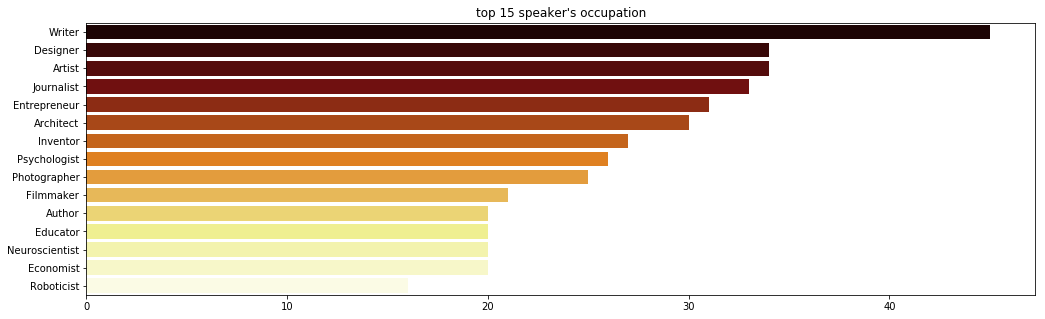

In [13]:
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(y=df1_new['speaker_occupation'].value_counts(ascending=False).head(15).index, 
              x=df1_new['speaker_occupation'].value_counts(ascending=False).head(15).values, ax=ax, palette='afmhot')
a.set(title="top 15 speaker's occupation")

#### based on the graph we can see that the most speakers invited to give speech are writers, and it's about more than 40. assume that the writers spend more time on planning,forming, and researching the topics based what they wrote or their experienced with. the second and the third place was public figure based on art field: artists and designers. the rest of the speakers mostly is an expert on their field related with science and entertainment

,comments,event,main_speaker,title,speaker_occupation,views,published_date
784,342,TEDxChange,Hans Rosling,The good news of the decade? We're winning the...,Global health expert; data visionary,738895,07-10-2010
447,125,TED2009,Hans Rosling,"Insights on HIV, in stunning data visuals",Global health expert; data visionary,904813,13-05-2009
502,122,TED@State,Hans Rosling,Let my dataset change your mindset,Global health expert; data visionary,1471039,27-08-2009
558,276,TEDIndia 2009,Hans Rosling,Asia's rise -- how and when,Global health expert; data visionary,1738069,23-11-2009
1236,491,TEDxSummit,Hans Rosling,Religions and babies,Global health expert; data visionary,2138419,22-05-2012
893,268,TEDWomen 2010,Hans Rosling,The magic washing machine,Global health expert; data visionary,2391977,21-03-2011
726,607,TED@Cannes,Hans Rosling,"Global population growth, box by box",Global health expert; data visionary,2934262,09-07-2010
117,261,TED2007,Hans Rosling,New insights on poverty,Global health expert; data visionary,3243784,25-06-2007
4,593,TED2006,Hans Rosling,The best stats you've ever seen,Global health expert; data visionary,12005869,28-06-2006


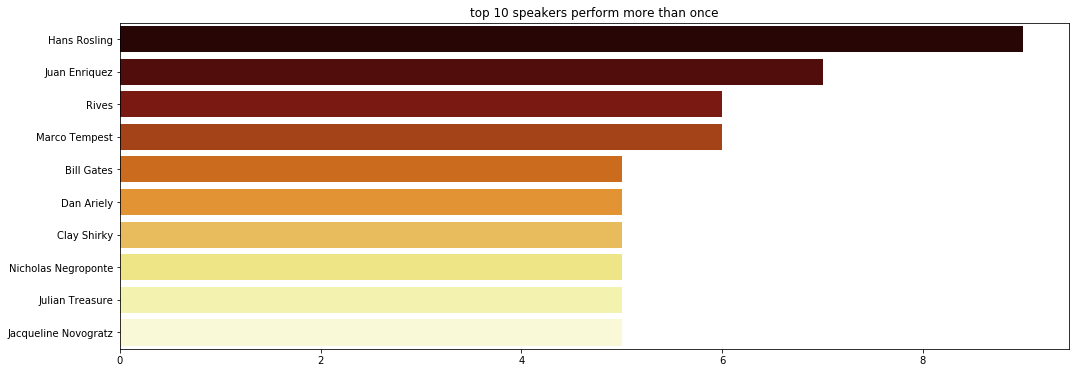

In [14]:
fig,ax=plt.subplots(figsize=(17,6))
a=sns.barplot(y=df1_new['main_speaker'].value_counts(ascending=False).head(10).index, 
              x=df1_new['main_speaker'].value_counts(ascending=False).head(10).values, ax=ax, palette='afmhot')
a.set(title="top 10 speakers perform more than once")

df1_new[df1_new.main_speaker=='Hans Rosling'].sort_values(by='views')


#### Hans Rosling first position for speakers that giving speech more than once, he had been speeched for 9 times. he was Global health expert and his first speech watched more than 12million. in mean time, health global issues had been so popular these years

### Events

[Text(0.5, 1.0, 'top 15 most held yearly event')]

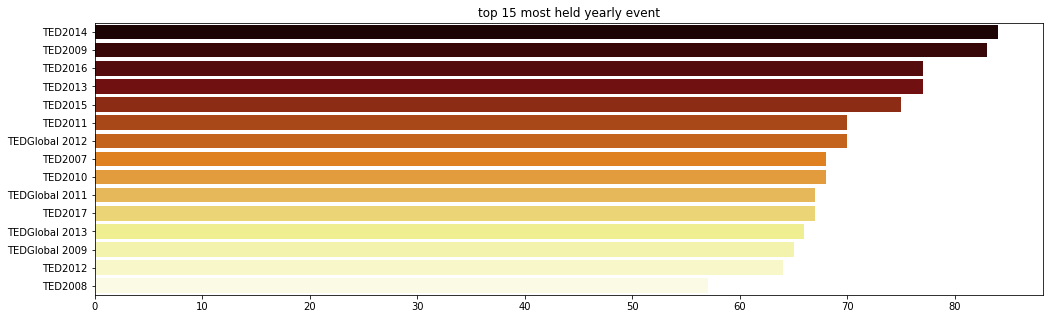

In [15]:
fig,ax=plt.subplots(figsize=(17,5))
b=sns.barplot(y=df1_new['event'].value_counts(ascending=False).head(15).index, 
            x=df1_new['event'].value_counts(ascending=False).head(15).values, ax=ax, palette='afmhot')
b.set(title='top 15 most held yearly event')

#### Based on event, TED2014 and TED2019 held more than 80 times, but accumulative in general year TED had been held more than 300 times in 2012 (graph time series below)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


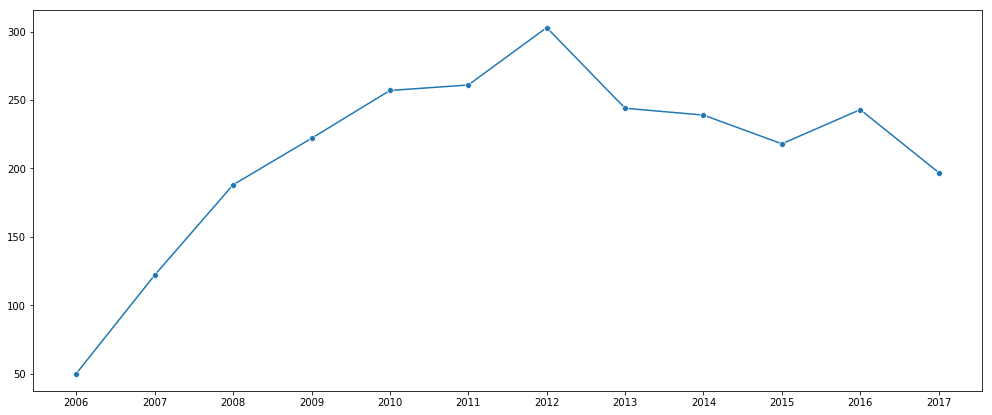

In [16]:
df1_new['year']=df1_new['published_date'].apply(lambda x: x[-4:])
ig,ax=plt.subplots(figsize=(17,7))
sns.lineplot(x=df1_new['year'].value_counts().index,y=df1_new['year'].value_counts().values, marker='o')

### Views and Comments

[Text(0.5, 1.0, 'top 10 most watched based on title')]

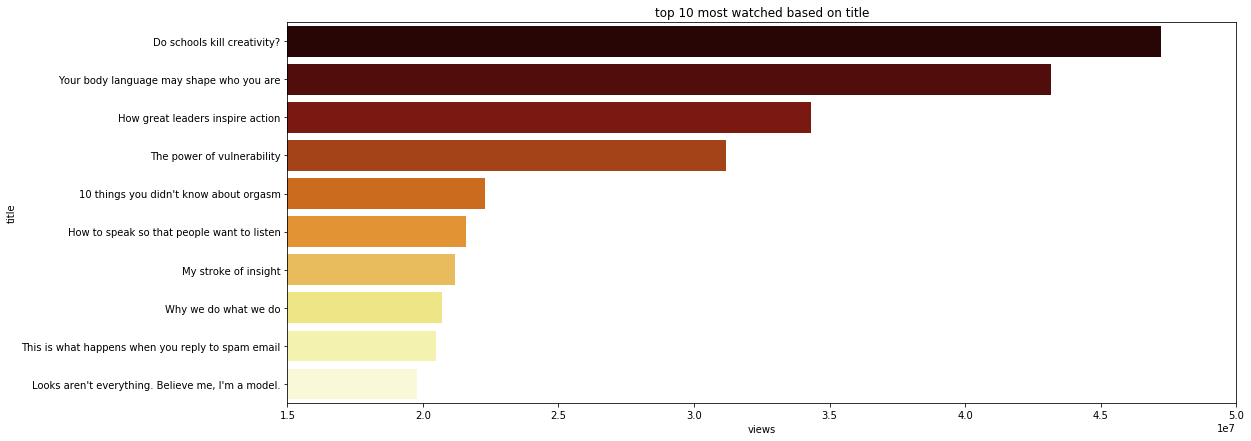

In [17]:
fig,ax=plt.subplots(figsize=(17,7))
d=sns.barplot(x=df1_new[df1_new['views']>1000000].sort_values(by='views', ascending=False).head(10)['views'],
              y=df1_new[df1_new['views']>1000000].sort_values(by='views', ascending=False).head(10)['title'],palette='afmhot', ax=ax)
d.set(xlim=(15000000,50000000))
d.set(title='top 10 most watched based on title')

In [18]:
df1_new[df1_new['comments']>500].sort_values(by='views',ascending=False).head(10)

,comments,event,main_speaker,title,speaker_occupation,views,published_date,year
0,4553,TED2006,Ken Robinson,Do schools kill creativity?,Author/educator,47227110,27-06-2006,2006
1343,2290,TEDGlobal 2012,Amy Cuddy,Your body language may shape who you are,Social psychologist,43155405,01-10-2012,2012
677,1930,TEDxPuget Sound,Simon Sinek,How great leaders inspire action,Leadership expert,34309432,04-05-2010,2010
837,1927,TEDxHouston,Brené Brown,The power of vulnerability,Vulnerability researcher,31168150,23-12-2010,2010
201,2877,TED2008,Jill Bolte Taylor,My stroke of insight,Neuroanatomist,21190883,12-03-2008,2008
5,672,TED2006,Tony Robbins,Why we do what we do,Life coach; expert in leadership psychology,20685401,28-06-2006,2006
1413,846,TEDxMidAtlantic,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",Model,19787465,16-01-2013,2013
500,1094,TEDGlobal 2009,Dan Pink,The puzzle of motivation,Career analyst,18830983,24-08-2009,2009
1162,1155,TED2012,Susan Cain,The power of introverts,Quiet revolutionary,17629275,03-03-2012,2012
1036,561,TEDGlobal 2011,Pamela Meyer,How to spot a liar,Lie detector,16861578,13-10-2011,2011


#### Based on the views, the title look interesting and extraordinary

[Text(0.5, 1.0, 'top 10 most commented based on title')]

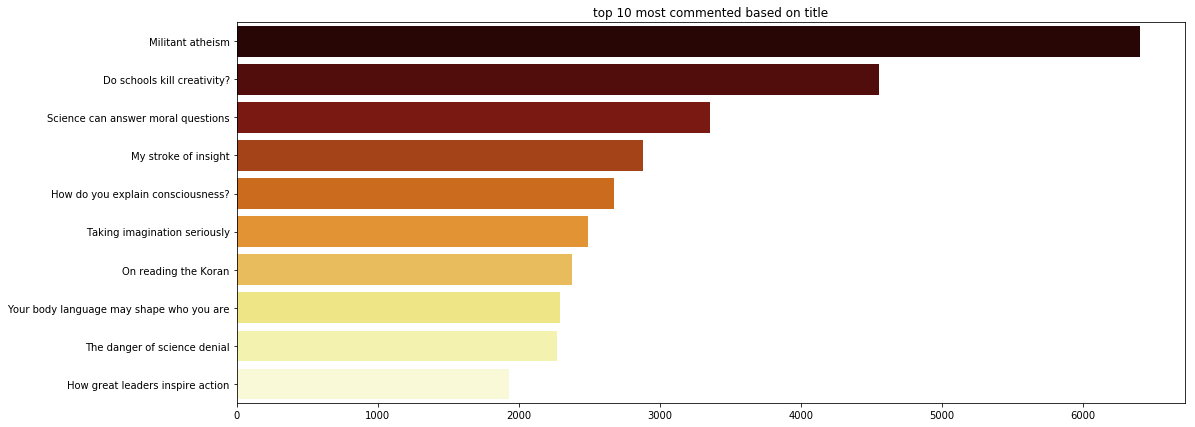

In [19]:
fig,ax=plt.subplots(figsize=(17,7))
e=sns.barplot(y=df1_new.sort_values(by='comments', ascending=False)['title'].head(10).values,
            x=df1_new.sort_values(by='comments', ascending=False)['comments'].head(10).values, palette='afmhot', ax=ax)
e.set(title='top 10 most commented based on title')


#### Based on the most commented is about faith or what people believe, total commented more than 6000 (it doesnt disclose the type of the comment: is it a respond to the TED video or a respond to another comment from another user)

### Most Watched in few years

# Recommendation System based on Tags

### clean the tags

In [20]:
import re

In [21]:
def clean_text(x):
    letter_only=re.sub("[^a-zA-Z]", " ", x)
    return ' '.join(letter_only.split()).lower()

In [22]:
df1_new['tags']=df1['tags']
df1_new.tags=df1_new.tags.astype('str')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
df1_new['tags']=df1_new['tags'].apply(clean_text)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df1_new.head(2)

,comments,event,main_speaker,title,speaker_occupation,views,published_date,year,tags
0,4553,TED2006,Ken Robinson,Do schools kill creativity?,Author/educator,47227110,27-06-2006,2006,children creativity culture dance education pa...
1,265,TED2006,Al Gore,Averting the climate crisis,Climate advocate,3200520,27-06-2006,2006,alternative energy cars climate change culture...


### Convert to sparse matrix using count vectorize

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv=CountVectorizer()
cv_tags=cv.fit_transform(df1_new['tags'])
#df_tags=pd.DataFrame(cv_tags.todense(), columns=cv.get_feature_names(), index=df1_new['title'])

### using Cosine Similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
cos_sim=cosine_similarity(cv_tags)

In [29]:
def get_recommendation_based_title(x):
    index_to_search = df1_new[df1_new['title']==x].index[0]
    series_similar=pd.Series(cos_sim[index_to_search])
    index_similar=series_similar.sort_values(ascending=False).head(10).index
    return df1_new.loc[index_similar]

In [30]:
get_recommendation_based_title('Do schools kill creativity?')

,comments,event,main_speaker,title,speaker_occupation,views,published_date,year,tags
0,4553,TED2006,Ken Robinson,Do schools kill creativity?,Author/educator,47227110,27-06-2006,2006,children creativity culture dance education pa...
1417,818,TEDxMidAtlantic,Colin Powell,Kids need structure,Former U.S. Secretary of State,1485801,23-01-2013,2013,tedx children culture education parenting stud...
1495,120,TED Talks Education,Pearl Arredondo,"My story, from gangland daughter to star teacher",Teacher,1059278,08-05-2013,2013,children education teaching
280,174,LIFT 2007,Sugata Mitra,Kids can teach themselves,Education researcher,1486853,27-08-2008,2008,children cities culture education global issue...
830,301,TEDxMidAtlantic,Diana Laufenberg,How to learn? From mistakes,Educator,1882742,15-12-2010,2010,tedx children culture education
1490,632,TED Talks Education,Rita Pierson,Every kid needs a champion,Educator,7469445,03-05-2013,2013,children education motivation teaching
654,795,TED2010,Adora Svitak,What adults can learn from kids,Child prodigy,4782854,02-04-2010,2010,children creativity education intelligence
1585,313,TED2013,James Flynn,Why our IQ levels are higher than our grandpar...,Moral philosopher,2991225,26-09-2013,2013,culture education
1023,155,TEDGlobal 2011,Geoff Mulgan,A short intro to the Studio School,Social commentator,667985,27-09-2011,2011,creativity culture design education work
1499,634,TED Talks Education,Ken Robinson,How to escape education's death valley,Author/educator,6657858,10-05-2013,2013,culture education student teaching testing


In [31]:
def get_recommendation_based_speakers(x):
    index_to_search = df1_new[df1_new['main_speaker']==x].index[0]
    series_similar=pd.Series(cos_sim[index_to_search])
    index_similar=series_similar.sort_values(ascending=False).head(10).index
    return df1_new.loc[index_similar]

In [32]:
get_recommendation_based_speakers('Hans Rosling')

,comments,event,main_speaker,title,speaker_occupation,views,published_date,year,tags
4,593,TED2006,Hans Rosling,The best stats you've ever seen,Global health expert; data visionary,12005869,28-06-2006,2006,africa asia google demo economics global devel...
117,261,TED2007,Hans Rosling,New insights on poverty,Global health expert; data visionary,3243784,25-06-2007,2007,africa asia google economics global developmen...
502,122,TED@State,Hans Rosling,Let my dataset change your mindset,Global health expert; data visionary,1471039,27-08-2009,2009,africa asia data global development global iss...
1814,177,TEDSalon Berlin 2014,Hans and Ola Rosling,How not to be ignorant about the world,Global health expert; data visionary,3673455,11-09-2014,2014,global issues health statistics
122,136,TED2007,Emily Oster,Flip your thinking on AIDS in Africa,Assumption-busting economist,854967,12-07-2007,2007,aids africa economics global issues health sci...
127,97,TEDGlobal 2007,George Ayittey,Africa's cheetahs versus hippos,Economist,648234,30-07-2007,2007,africa business corruption economics entrepren...
1857,100,TEDGlobal 2014,Michael Green,What the Social Progress Index can reveal abou...,Social progress expert,1132771,11-11-2014,2014,economics global issues policy statistics
1094,119,TEDxCanberra,Thomas Pogge,Medicine for the 99 percent,Philosopher,242251,18-12-2011,2011,tedx economics global issues health
1604,207,TEDGlobal 2013,Charles Robertson,Africa's next boom,Emerging-markets economist,1204089,22-10-2013,2013,africa business economics global issues
234,139,TED2008,Paul Collier,"The ""bottom billion""",Economist,990220,28-05-2008,2008,africa activism business economics global deve...


In [33]:
def get_recommendation_based_speaker_occupation(x):
    index_to_search = df1_new[df1_new['speaker_occupation']==x].index[0]
    series_similar=pd.Series(cos_sim[index_to_search])
    index_similar=series_similar.sort_values(ascending=False).head(10).index
    return df1_new.loc[index_similar]

In [34]:
get_recommendation_based_speaker_occupation('Artist')

,comments,event,main_speaker,title,speaker_occupation,views,published_date,year,tags
78,84,TED2003,Vik Muniz,"Art with wire, sugar, chocolate and string",Artist,1149090,05-04-2007,2007,brazil animation art creativity design illusion
959,281,TED2011,Shea Hembrey,How I became 100 artists,Artist and curator,1486880,14-06-2011,2011,art creativity design storytelling
1309,223,TEDGlobal 2012,Kirby Ferguson,Embrace the remix,Filmmaker and Remixer,1356163,10-08-2012,2012,art creativity
1151,181,INK Conference,Shilo Shiv Suleman,Using tech to enable dreaming,Artist,576918,22-02-2012,2012,art creativity
495,103,TEDGlobal 2009,Willard Wigan,Hold your breath for micro-sculpture,Micro-sculptor,640722,03-08-2009,2009,art creativity
382,21,TED1998,Milton Glaser,Using design to make ideas new,Graphic designer,382985,11-02-2009,2009,art communication creativity culture design
351,58,TED2001,Eva Zeisel,The playful search for beauty,Designer,438972,09-12-2008,2008,art creativity design exploration play
801,144,TEDGlobal 2010,Miwa Matreyek,Glorious visions in animation and performance,Multimedia artist,829399,29-10-2010,2010,animation art design performance technology
1571,257,TEDGlobal 2013,Alexa Meade,Your body is my canvas,Visual artist,2682427,06-09-2013,2013,art creativity design painting photography
2495,3,TEDNYC,Françoise Mouly,The stories behind The New Yorker's iconic covers,Art editor,839040,03-08-2017,2017,tednyc art creativity culture design humor


#### Based on 3 function above, we can get reccomendation using title, main speakers and speakers occupation. to get the simlarity tags we are using count vectorizer to make the binary, and then transform it into numbers that can be count based on their cosine similarity to get their nearest tags